In [25]:
import os
import json
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [26]:
file_path = '../../data/10fold/preds'

In [27]:
reports = []

for fold_num in range(1, 11):
    # Construct the file name for the current fold
    file_name = f'val_predictions_fold_{fold_num}.json'
    file_full_path = os.path.join(file_path, file_name)
    
    # Load the JSON data
    with open(file_full_path, 'r') as f:
        data = json.load(f)
    
    # Extract true labels and predicted labels
    # Map true labels to 1 (positive) and -1 (negative)
    true_labels = [1 if entry['label'] == 'positive' else -1 for entry in data]
    
    # Extract the predicted labels from the first 40 characters of llama3B_valence
    predicted_labels = []
    for entry in data:
        valence_text = entry['llama3B_valence'][:40].lower()
        if 'positive' in valence_text:
            predicted_labels.append(1)
        elif 'negative' in valence_text:
            predicted_labels.append(-1)
        else:
            # Handle case where neither "positive" nor "negative" is found
            predicted_labels.append(0)  # Or another value indicating unknown prediction
    
    # Compute classification report for the current fold
    report = classification_report(true_labels, predicted_labels, output_dict=True, zero_division=0)
    reports.append(report)
    
    # Display the classification report for the current fold
    print(f"Classification report for fold {fold_num}:")
    print(classification_report(true_labels, predicted_labels, zero_division=0))
    print("-" * 60)

# Calculate average and standard deviation for accuracy, precision, recall, and F1-score
metrics = ['accuracy', 'precision', 'recall', 'f1-score']
results = {metric: {'mean': [], 'std': []} for metric in metrics}

# Collect all the results for each fold in a DataFrame
df_data = []
for fold_report in reports:
    # Check if 'weighted avg' is present in the report
    if 'weighted avg' in fold_report:
        fold_metrics = {metric: fold_report['weighted avg'].get(metric, 0) for metric in metrics}
    else:
        # Fallback: if 'weighted avg' is not available, set metrics to 0 or other default
        fold_metrics = {metric: 0 for metric in metrics}
    df_data.append(fold_metrics)

df = pd.DataFrame(df_data)

# Compute mean and standard deviation for each metric
for metric in metrics:
    results[metric]['mean'] = df[metric].mean()
    results[metric]['std'] = df[metric].std()

# Display aggregated results
print("\nMetrics across all folds (mean and standard deviation):")
for metric in metrics:
    print(f"{metric.capitalize()}: Mean = {results[metric]['mean']:.4f}, Std Dev = {results[metric]['std']:.4f}")


Classification report for fold 1:
              precision    recall  f1-score   support

          -1       0.29      0.25      0.27         8
           1       0.57      0.62      0.59        13

    accuracy                           0.48        21
   macro avg       0.43      0.43      0.43        21
weighted avg       0.46      0.48      0.47        21

------------------------------------------------------------
Classification report for fold 2:
              precision    recall  f1-score   support

          -1       0.10      0.20      0.13         5
           1       0.64      0.44      0.52        16

    accuracy                           0.38        21
   macro avg       0.37      0.32      0.33        21
weighted avg       0.51      0.38      0.43        21

------------------------------------------------------------
Classification report for fold 3:
              precision    recall  f1-score   support

          -1       0.11      0.33      0.17         3
           1 

In [28]:
reports = []

# Iterate over each fold's prediction file
for fold_num in range(1, 11):
    # Construct the file name for the current fold
    file_name = f'val_predictions_fold_{fold_num}.json'
    file_full_path = os.path.join(file_path, file_name)
    
    # Load the JSON data
    with open(file_full_path, 'r') as f:
        data = json.load(f)
    
    # Extract true labels and predicted labels
    # Map true labels to 1 (positive) and -1 (negative)
    true_labels = [1 if entry['label'] == 'positive' else -1 for entry in data]
    
    # Extract the predicted labels from the first 40 characters of llama3B_valence
    predicted_labels = []
    for entry in data:
        valence_text = entry['llama3B_valence'][:40].lower()
        if 'positive' in valence_text:
            predicted_labels.append(1)
        elif 'negative' in valence_text:
            predicted_labels.append(-1)
        else:
            # Handle case where neither "positive" nor "negative" is found
            predicted_labels.append(0)  # Or another value indicating unknown prediction
    
    # Compute classification report for the current fold
    report = classification_report(true_labels, predicted_labels, output_dict=True, zero_division=0)
    reports.append(report)
    
    # Display the classification report for the current fold
    print(f"Classification report for fold {fold_num}:")
    print(classification_report(true_labels, predicted_labels, zero_division=0))
    print("-" * 60)

# Calculate average and standard deviation for accuracy, macro avg, and weighted avg metrics
metrics = ['accuracy', 'precision', 'recall', 'f1-score']
results = {metric: {'mean': [], 'std': []} for metric in metrics}

# Collect all the results for each fold in a DataFrame
df_data = []
for fold_report in reports:
    fold_metrics = {
        'accuracy': fold_report.get('accuracy', 0),
        **{f'macro avg_{metric}': fold_report['macro avg'].get(metric, 0) for metric in metrics},
        **{f'weighted avg_{metric}': fold_report['weighted avg'].get(metric, 0) for metric in metrics}
    }
    df_data.append(fold_metrics)

df = pd.DataFrame(df_data)

# Compute mean and standard deviation for each metric
for metric in ['accuracy'] + [f'macro avg_{m}' for m in metrics] + [f'weighted avg_{m}' for m in metrics]:
    results[metric] = {
        'mean': df[metric].mean(),
        'std': df[metric].std()
    }

# Display aggregated results
print("\nMetrics across all folds (mean and standard deviation):")
for metric in ['accuracy'] + [f'macro avg_{m}' for m in metrics] + [f'weighted avg_{m}' for m in metrics]:
    print(f"{metric.capitalize()}: Mean = {results[metric]['mean']:.4f}, Std Dev = {results[metric]['std']:.4f}")


Classification report for fold 1:
              precision    recall  f1-score   support

          -1       0.29      0.25      0.27         8
           1       0.57      0.62      0.59        13

    accuracy                           0.48        21
   macro avg       0.43      0.43      0.43        21
weighted avg       0.46      0.48      0.47        21

------------------------------------------------------------
Classification report for fold 2:
              precision    recall  f1-score   support

          -1       0.10      0.20      0.13         5
           1       0.64      0.44      0.52        16

    accuracy                           0.38        21
   macro avg       0.37      0.32      0.33        21
weighted avg       0.51      0.38      0.43        21

------------------------------------------------------------
Classification report for fold 3:
              precision    recall  f1-score   support

          -1       0.11      0.33      0.17         3
           1 

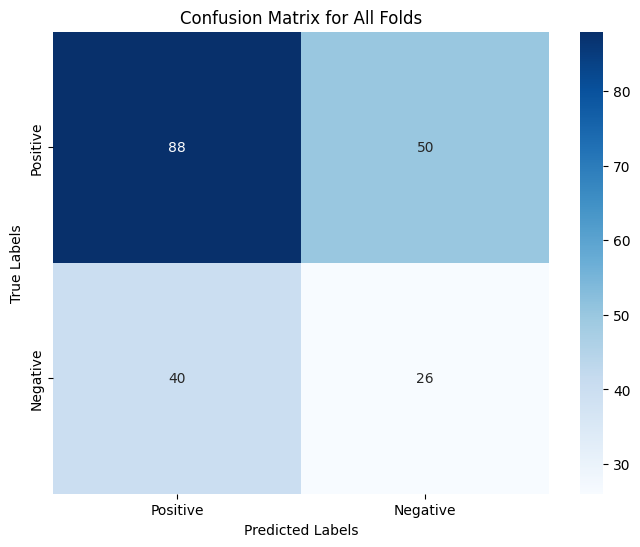

In [29]:
# Lists to accumulate the true and predicted labels from all folds
all_true_labels = []
all_predicted_labels = []

# Iterate over each fold's prediction file
for fold_num in range(1, 11):
    # Construct the file name for the current fold
    file_name = f'val_predictions_fold_{fold_num}.json'
    file_full_path = os.path.join(file_path, file_name)
    
    # Load the JSON data
    with open(file_full_path, 'r') as f:
        data = json.load(f)
    
    # Extract true labels and predicted labels
    # Map true labels to 1 (positive) and -1 (negative)
    true_labels = [1 if entry['label'] == 'positive' else -1 for entry in data]
    
    # Extract the predicted labels from the first 40 characters of llama3B_valence
    predicted_labels = []
    for entry in data:
        valence_text = entry['llama3B_valence'][:40].lower()
        if 'positive' in valence_text:
            predicted_labels.append(1)
        elif 'negative' in valence_text:
            predicted_labels.append(-1)
        else:
            # Handle case where neither "positive" nor "negative" is found
            predicted_labels.append(0)  # Or another value indicating unknown prediction
    
    # Accumulate the labels for all folds
    all_true_labels.extend(true_labels)
    all_predicted_labels.extend(predicted_labels)

# Compute the confusion matrix
conf_matrix = confusion_matrix(all_true_labels, all_predicted_labels, labels=[1, -1])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative',], yticklabels=['Positive', 'Negative'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for All Folds')
plt.show()

Average precision, recall, and F1-score across all folds:

Positive class:
Precision: Mean = 0.7068, Std Dev = 0.1561
Recall: Mean = 0.6546, Std Dev = 0.1216
F1-score: Mean = 0.6600, Std Dev = 0.0856

Negative class:
Precision: Mean = 0.3736, Std Dev = 0.1887
Recall: Mean = 0.4338, Std Dev = 0.2113
F1-score: Mean = 0.3593, Std Dev = 0.1525


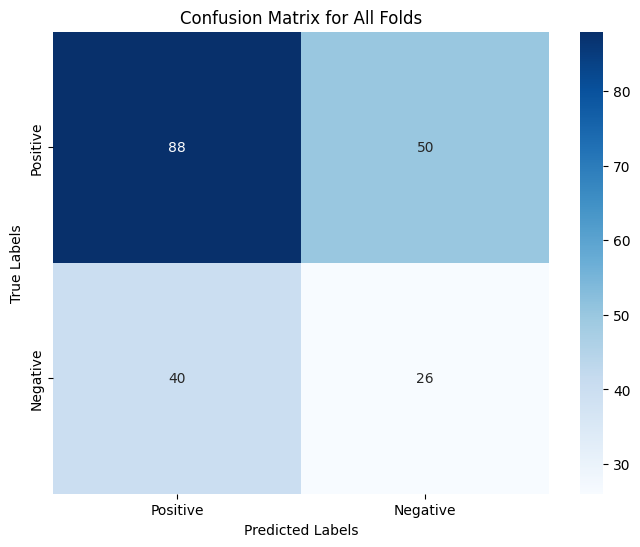

In [30]:
# Lists to accumulate the true and predicted labels from all folds
all_true_labels = []
all_predicted_labels = []

# List to store the classification reports for each fold
reports = []

# Iterate over each fold's prediction file
for fold_num in range(1, 11):
    # Construct the file name for the current fold
    file_name = f'val_predictions_fold_{fold_num}.json'
    file_full_path = os.path.join(file_path, file_name)
    
    # Load the JSON data
    with open(file_full_path, 'r') as f:
        data = json.load(f)
    
    # Extract true labels and predicted labels
    # Map true labels to 1 (positive) and -1 (negative)
    true_labels = [1 if entry['label'] == 'positive' else -1 for entry in data]
    
    # Extract the predicted labels from the first 40 characters of llama3B_valence
    predicted_labels = []
    for entry in data:
        valence_text = entry['llama3B_valence'][:40].lower()
        if 'positive' in valence_text:
            predicted_labels.append(1)
        elif 'negative' in valence_text:
            predicted_labels.append(-1)
        else:
            # Handle case where neither "positive" nor "negative" is found
            predicted_labels.append(0)  # Or another value indicating unknown prediction
    
    # Accumulate the labels for all folds
    all_true_labels.extend(true_labels)
    all_predicted_labels.extend(predicted_labels)
    
    # Compute classification report for the current fold and store it
    report = classification_report(true_labels, predicted_labels, output_dict=True, zero_division=0)
    reports.append(report)

# Calculate averages for precision, recall, and F1-score for positive (1) and negative (-1) classes
metrics = ['precision', 'recall', 'f1-score']
class_metrics = {'positive': {metric: [] for metric in metrics}, 'negative': {metric: [] for metric in metrics}}

# Collect metrics for each fold
for report in reports:
    if '1' in report:  # Positive class metrics
        for metric in metrics:
            class_metrics['positive'][metric].append(report['1'].get(metric, 0))
    if '-1' in report:  # Negative class metrics
        for metric in metrics:
            class_metrics['negative'][metric].append(report['-1'].get(metric, 0))

# Compute mean and standard deviation for positive and negative classes
results = {}
for label in ['positive', 'negative']:
    results[label] = {
        metric: {
            'mean': np.mean(class_metrics[label][metric]),
            'std': np.std(class_metrics[label][metric])
        }
        for metric in metrics
    }

# Display the results
print("Average precision, recall, and F1-score across all folds:")
for label in ['positive', 'negative']:
    print(f"\n{label.capitalize()} class:")
    for metric in metrics:
        mean = results[label][metric]['mean']
        std = results[label][metric]['std']
        print(f"{metric.capitalize()}: Mean = {mean:.4f}, Std Dev = {std:.4f}")

# Create a confusion matrix for all accumulated predictions
conf_matrix = confusion_matrix(all_true_labels, all_predicted_labels, labels=[1, -1])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative',], yticklabels=['Positive', 'Negative'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for All Folds')
plt.show()